## 時間處理(Time Series)

- 時間戳記(timestamp)
- 固定時間(2021-1-1,2021-1,2021)
- 一段時間(起始-結束)

### Date and Time Data Types

- python提供內建3種module處理時間datatime,time,calendar

In [5]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2022, 6, 6, 8, 28, 8, 942807)

In [6]:
now.year, now.month, now.day

(2022, 6, 6)

- datetime.timedelta 是提供儲存一段時間的類型

In [7]:
delta = datetime(2017,1,7) - datetime(2011, 6, 24, 8, 15)
delta

datetime.timedelta(days=2023, seconds=56700)

In [8]:
delta.days, delta.seconds

(2023, 56700)

 - 可以使用datatime和timedelta的數學運算來增加或減少時間

In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字串和Datatime之間的轉換

#### 使用str(),datetime的方法strftime(),將時間轉成字串

%Y -> Four-digit year

%y -> Two-digit year

%m -> Two-digit month [01, 12] 

%d -> Two-digit day [01, 31]

%H -> Hour (24-hour clock) [00, 23]

%I -> Hour (12-hour clock) [01, 12]

%M Two-digit minute [00, 59]

%S Second [00, 61] (seconds 60, 61 account for leap seconds) 

%w Weekday as integer [0 (Sunday), 6]


In [11]:
stamp = datetime(2011, 1, 3)
str(stamp) , stamp.strftime("%Y-%m-%d")

('2011-01-03 00:00:00', '2011-01-03')

### 將字串轉成時間(datetime.strptime())

In [12]:
value = '2011-03-01'
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 3, 1, 0, 0)

In [13]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datatime.strptime()非常好使用，但每次要指定格式也是非常麻煩，可以使用第3方套件dateutil的parse方法

- pip install python-dateutil

In [14]:
from dateutil.parser import parse

parse('2011-01-03') , parse('Jan 31, 1997 10:15 PM')

(datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(1997, 1, 31, 22, 15))

- 在國際上有時會日期放在前方，只要設定dayfirst=True來指示

In [15]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

#### pandas提供to_datetime方法，快速將包含時間字串(ISO8601)的list轉換為DatetimeIndex

In [16]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)
            

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

### Time Series的基礎操作

- 最常使用的是將Time Series常作index
- 建立Time Series時使用的是datetime物件或str

In [17]:
#將datetime放入list內
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2021,1,2),
         datetime(2021,1,5),
         datetime(2021,1,9),
         datetime(2021,1,13),
         datetime(2021,1,21)]
ts = pd.Series(np.random.randn(5),index=dates)
ts

2021-01-02   -0.073071
2021-01-05   -1.628603
2021-01-09    0.515068
2021-01-13   -0.126277
2021-01-21    0.553736
dtype: float64

In [18]:
#DatetimeIndex
ts.index

DatetimeIndex(['2021-01-02', '2021-01-05', '2021-01-09', '2021-01-13',
               '2021-01-21'],
              dtype='datetime64[ns]', freq=None)

### 時間當作索引時,數學運算是使用有相同索引的內容相運算

In [19]:
ts[::2]

2021-01-02   -0.073071
2021-01-09    0.515068
2021-01-21    0.553736
dtype: float64

In [20]:
ts + ts[::2]

2021-01-02   -0.146142
2021-01-05         NaN
2021-01-09    1.030135
2021-01-13         NaN
2021-01-21    1.107472
dtype: float64

### pandas內取出的時間物件是pandas內的Timestamp物件

In [21]:
stamp = ts.index[0]
stamp.__class__

pandas._libs.tslibs.timestamps.Timestamp

### pandas的Timestamp物件的操作相似於datetime.datetime

In [22]:
stamp = ts.index[0]
stamp, stamp.year, stamp.day, stamp.hour, stamp.minute, stamp.second

(Timestamp('2021-01-02 00:00:00'), 2021, 2, 0, 0, 0)

In [23]:
stamp.strftime('%Y-%m-%d %X')

'2021-01-02 00:00:00'

### Indexing, Slection, Subsetting

In [24]:
ts

2021-01-02   -0.073071
2021-01-05   -1.628603
2021-01-09    0.515068
2021-01-13   -0.126277
2021-01-21    0.553736
dtype: float64

In [25]:
#Timestamp當作索引

stamp=ts.index[2]
ts[stamp]

0.5150675275364429

### 做用時間字串會被解譯成datetime物件

In [26]:
#時間字串當作索引
ts['2021-01-02'], ts['1/2/2021'], ts['20210102']

(-0.07307085387608445, -0.07307085387608445, -0.07307085387608445)

### 自行建立有DateTime的索引
### 使用pd.date_range()建立長的Time Series 

In [27]:
#使用pd.date_range()建立長的Time Series 
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2019',periods=1000))
longer_ts

2019-01-01   -0.992375
2019-01-02    0.107719
2019-01-03    0.662798
2019-01-04    1.750567
2019-01-05    0.800404
                ...   
2021-09-22    0.439032
2021-09-23   -0.036940
2021-09-24   -0.672778
2021-09-25   -1.251773
2021-09-26    0.483093
Freq: D, Length: 1000, dtype: float64

In [28]:
#只索引年份,會索引出所有該年份的row
longer_ts['2019']

2019-01-01   -0.992375
2019-01-02    0.107719
2019-01-03    0.662798
2019-01-04    1.750567
2019-01-05    0.800404
                ...   
2019-12-27    0.256428
2019-12-28    1.219142
2019-12-29   -1.641535
2019-12-30    1.211676
2019-12-31   -1.289542
Freq: D, Length: 365, dtype: float64

In [29]:
#只索引年份和月份
longer_ts['2019-05']

2019-05-01   -0.952350
2019-05-02    0.613118
2019-05-03    0.838834
2019-05-04    0.009050
2019-05-05   -1.003858
2019-05-06   -0.584866
2019-05-07    0.456657
2019-05-08    0.933637
2019-05-09    0.134790
2019-05-10   -1.164979
2019-05-11   -0.048306
2019-05-12   -0.087895
2019-05-13    2.783338
2019-05-14   -0.478908
2019-05-15    0.376610
2019-05-16   -0.695515
2019-05-17   -0.276283
2019-05-18    0.305712
2019-05-19   -0.621387
2019-05-20   -1.853986
2019-05-21   -0.328761
2019-05-22    1.730500
2019-05-23   -0.233899
2019-05-24    0.488447
2019-05-25   -0.773623
2019-05-26   -0.454064
2019-05-27    0.642822
2019-05-28    1.150563
2019-05-29    0.153022
2019-05-30    1.007022
2019-05-31    0.789760
Freq: D, dtype: float64

### 也可以使用datetime物件

In [30]:
#使用slicing
longer_ts[datetime(2021,1,1):]

2021-01-01   -0.228521
2021-01-02    1.166953
2021-01-03    0.144106
2021-01-04   -0.618532
2021-01-05    0.519660
                ...   
2021-09-22    0.439032
2021-09-23   -0.036940
2021-09-24   -0.672778
2021-09-25   -1.251773
2021-09-26    0.483093
Freq: D, Length: 269, dtype: float64

### 注意不管是indexing還是slicing,全部是view,而不是copy新的一份,會更改到原始值

In [31]:
longer_ts['2021-1-1':'2021-3-31']

2021-01-01   -0.228521
2021-01-02    1.166953
2021-01-03    0.144106
2021-01-04   -0.618532
2021-01-05    0.519660
                ...   
2021-03-27   -2.551099
2021-03-28   -0.694370
2021-03-29    0.329660
2021-03-30   -1.154491
2021-03-31    0.626981
Freq: D, Length: 90, dtype: float64

In [32]:
#DataFrame
dates = pd.date_range('1/1/2021',periods=100)
long_df = pd.DataFrame(np.random.randn(100,4),
                      index = dates,
                      columns = ['台北','台中','高雄','花蓮'])
long_df

,台北,台中,高雄,花蓮
2021-01-01,0.526095,-0.535839,0.855063,-0.708683
2021-01-02,-3.284432,0.978665,2.023819,-1.930048
2021-01-03,0.317866,-1.241692,1.145685,0.275194
2021-01-04,-1.403687,-0.018486,0.674571,-0.878834
2021-01-05,1.119188,0.680342,0.179705,0.589225
...,...,...,...,...
2021-04-06,0.021030,-0.958819,-1.766055,1.250994
2021-04-07,2.345542,0.105510,-1.852041,-0.284437
2021-04-08,-0.277838,-0.351783,-1.778452,0.097637
2021-04-09,-0.196532,1.296747,1.216853,-1.271480


In [33]:
#使用loc
long_df.loc['2021-03']

,台北,台中,高雄,花蓮
2021-03-01,-0.125379,0.723645,-1.039961,-0.443801
2021-03-02,-0.114237,-1.120320,0.834483,-0.885030
2021-03-03,0.226344,0.296428,0.726573,-2.353661
2021-03-04,1.149472,0.475625,-0.147219,1.177752
2021-03-05,0.563260,-0.606249,-1.377926,-1.444023
2021-03-06,1.323103,0.963062,1.326925,0.263765
2021-03-07,-0.055381,0.164343,0.735230,1.522980
2021-03-08,-1.003559,0.475715,0.050764,1.580871
2021-03-09,0.369775,1.586291,-0.453924,-0.612431
2021-03-10,0.284781,0.616649,0.045489,-1.103632


### 重複的Time Series

In [34]:
dates = pd.DatetimeIndex(['1/1/2021','1/2/2021','1/2/2021','1/2/2021','1/3/2021'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2021-01-01    0
2021-01-02    1
2021-01-02    2
2021-01-02    3
2021-01-03    4
dtype: int64

### 使用is_unique屬性檢查是不是都是唯一值

In [35]:
#檢查是否有重覆
dup_ts.index.is_unique

False

In [36]:
dup_ts['1/3/2021'], dup_ts['1/2/2021']

(4,
 2021-01-02    1
 2021-01-02    2
 2021-01-02    3
 dtype: int64)

### 檢查DatetimeIndex是否有重覆:
- step1:使用groupby(level0)
- step2:count()

In [37]:
#使用groupby()處理
grouped = dup_ts.groupby(level=0)
grouped.mean(), grouped.count()

(2021-01-01    0.0
 2021-01-02    2.0
 2021-01-03    4.0
 dtype: float64,
 2021-01-01    1
 2021-01-02    3
 2021-01-03    1
 dtype: int64)

## Date Range(時間範圍),Frequencies(頻率),Shifting(上下偏移)
一般在pandas的time series被假設為不規則的頻率,然而有時會為了滿足一些應用程式,必需要的是相同頻率的time series,必需額外使用一些pandas time series的工具,將不規則的頻率的轉換為相同頻率

In [38]:
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2021,1,2),
         datetime(2021,1,5),
         datetime(2021,1,9),
         datetime(2021,1,13),
         datetime(2021,1,21)]
ts = pd.Series(np.random.randn(5),index=dates)
ts

2021-01-02   -0.133765
2021-01-05   -0.953193
2021-01-09    0.166497
2021-01-13    0.473287
2021-01-21   -1.438195
dtype: float64

- 使用resample('D')
建立以日為頻率的time series

- ffill()
填滿沒有資料的索引

### 建立 Date Range的time Series
- 使用pd.date_range()

In [39]:
#使用開始日期和結束日期
index = pd.date_range('2020-01-01','2022-06-01')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30',
               '2022-05-31', '2022-06-01'],
              dtype='datetime64[ns]', length=883, freq='D')

In [40]:
#使用開始日期和頻率
pd.date_range('2021-01-01',periods=20)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', freq='D')

In [41]:
#使用結束日期和頻率
pd.date_range(end='2021-06-04', periods=20)

DatetimeIndex(['2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', freq='D')

In [42]:
#保留時間資訊
pd.date_range('2021-05-06 12:56:31', periods=20)

DatetimeIndex(['2021-05-06 12:56:31', '2021-05-07 12:56:31',
               '2021-05-08 12:56:31', '2021-05-09 12:56:31',
               '2021-05-10 12:56:31', '2021-05-11 12:56:31',
               '2021-05-12 12:56:31', '2021-05-13 12:56:31',
               '2021-05-14 12:56:31', '2021-05-15 12:56:31',
               '2021-05-16 12:56:31', '2021-05-17 12:56:31',
               '2021-05-18 12:56:31', '2021-05-19 12:56:31',
               '2021-05-20 12:56:31', '2021-05-21 12:56:31',
               '2021-05-22 12:56:31', '2021-05-23 12:56:31',
               '2021-05-24 12:56:31', '2021-05-25 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [43]:
#移除時間資訊
pd.date_range('2021-05-06 12:56:31', periods=20, normalize=True)

DatetimeIndex(['2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25'],
              dtype='datetime64[ns]', freq='D')

### Frequencies(頻率),Date Offsets(一般時間)

In [44]:
#Date Offsets
#M->月
#D->日
#H->小時
#3M -> 3個月
#6D -> 6日

pd.date_range('2010-01-01', '2010-01-03', freq='4H')

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 04:00:00',
               '2010-01-01 08:00:00', '2010-01-01 12:00:00',
               '2010-01-01 16:00:00', '2010-01-01 20:00:00',
               '2010-01-02 00:00:00', '2010-01-02 04:00:00',
               '2010-01-02 08:00:00', '2010-01-02 12:00:00',
               '2010-01-02 16:00:00', '2010-01-02 20:00:00',
               '2010-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [45]:
pd.date_range('2010-01-01','2010-01-02',freq='1h30min')

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:30:00',
               '2010-01-01 03:00:00', '2010-01-01 04:30:00',
               '2010-01-01 06:00:00', '2010-01-01 07:30:00',
               '2010-01-01 09:00:00', '2010-01-01 10:30:00',
               '2010-01-01 12:00:00', '2010-01-01 13:30:00',
               '2010-01-01 15:00:00', '2010-01-01 16:30:00',
               '2010-01-01 18:00:00', '2010-01-01 19:30:00',
               '2010-01-01 21:00:00', '2010-01-01 22:30:00',
               '2010-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

#### week of month dates

In [46]:
#每個月的第3個星期天
rng = pd.date_range('2021-01-01', '2022-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2021-01-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-02-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-03-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-04-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-05-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-06-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-07-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-08-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-09-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-10-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-11-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2021-12-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-01-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-02-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-03-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-04-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-05-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-06-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-07-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('

### shifting(Leading and Lagging)Data - 向上偏移和向下偏移

In [47]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2021-01-01', periods=4, freq='M'))
ts

2021-01-31   -0.320329
2021-02-28    0.468561
2021-03-31    0.110618
2021-04-30    0.215574
Freq: M, dtype: float64

In [48]:
#向下偏移
ts.shift(2)

2021-01-31         NaN
2021-02-28         NaN
2021-03-31   -0.320329
2021-04-30    0.468561
Freq: M, dtype: float64

In [49]:
#向上偏移
ts.shift(-2)

2021-01-31    0.110618
2021-02-28    0.215574
2021-03-31         NaN
2021-04-30         NaN
Freq: M, dtype: float64

In [50]:
#時間偏移常被拿來作為2個時間點的差或比例
#shift()不會移動index,所以可以使用運算,因為運算是以index為基礎來進行運算
#目前時間和上個時間的比例

ts/ ts.shift(1) - 1

2021-01-31         NaN
2021-02-28   -2.462750
2021-03-31   -0.763921
2021-04-30    0.948827
Freq: M, dtype: float64

In [51]:
### 使用resample()計算每個月或每天每年的計算
ts

2021-01-31   -0.320329
2021-02-28    0.468561
2021-03-31    0.110618
2021-04-30    0.215574
Freq: M, dtype: float64

In [52]:
ts.resample('M').mean()

2021-01-31   -0.320329
2021-02-28    0.468561
2021-03-31    0.110618
2021-04-30    0.215574
Freq: M, dtype: float64

In [53]:
resampler = ts.resample('D')
resampler.ffill()

2021-01-31   -0.320329
2021-02-01   -0.320329
2021-02-02   -0.320329
2021-02-03   -0.320329
2021-02-04   -0.320329
                ...   
2021-04-26    0.110618
2021-04-27    0.110618
2021-04-28    0.110618
2021-04-29    0.110618
2021-04-30    0.215574
Freq: D, Length: 90, dtype: float64

### 時區的處理

In [54]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [55]:
tz = pytz.timezone('Asia/Taipei')
tz

<DstTzInfo 'Asia/Taipei' LMT+8:06:00 STD>

#### 時區的轉換
- time Series預設是沒有時區的

In [57]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -1.045322
2012-03-10 09:30:00   -0.773299
2012-03-11 09:30:00    1.413760
2012-03-12 09:30:00    0.061864
2012-03-13 09:30:00   -0.284598
2012-03-14 09:30:00    0.663402
Freq: D, dtype: float64

In [59]:
#預設時區是None
print(ts.index.tz)

None


In [60]:
#建立有時區的DatetimeIndex
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [61]:

ts

2012-03-09 09:30:00   -1.045322
2012-03-10 09:30:00   -0.773299
2012-03-11 09:30:00    1.413760
2012-03-12 09:30:00    0.061864
2012-03-13 09:30:00   -0.284598
2012-03-14 09:30:00    0.663402
Freq: D, dtype: float64

In [62]:
#本沒有時區資訊轉換為有時區,使用tz_localize()
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.045322
2012-03-10 09:30:00+00:00   -0.773299
2012-03-11 09:30:00+00:00    1.413760
2012-03-12 09:30:00+00:00    0.061864
2012-03-13 09:30:00+00:00   -0.284598
2012-03-14 09:30:00+00:00    0.663402
Freq: D, dtype: float64

In [64]:
#本沒有時區資訊轉換為有時區,使用tz_localize()
ts_taipei = ts.tz_localize('Asia/Taipei')
ts_taipei

2012-03-09 09:30:00+08:00   -1.045322
2012-03-10 09:30:00+08:00   -0.773299
2012-03-11 09:30:00+08:00    1.413760
2012-03-12 09:30:00+08:00    0.061864
2012-03-13 09:30:00+08:00   -0.284598
2012-03-14 09:30:00+08:00    0.663402
dtype: float64

In [66]:
#將現有的時區,轉換為其它時區tz_convert()
ts_New_York = ts_taipei.tz_convert('America/New_York')
ts_New_York

2012-03-08 20:30:00-05:00   -1.045322
2012-03-09 20:30:00-05:00   -0.773299
2012-03-10 20:30:00-05:00    1.413760
2012-03-11 21:30:00-04:00    0.061864
2012-03-12 21:30:00-04:00   -0.284598
2012-03-13 21:30:00-04:00    0.663402
dtype: float64

In [68]:
#將pd.Timestamp轉換時區
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [69]:
#將pd.Timestamp轉換時區
stamp_taipei = stamp_utc.tz_convert('Asia/Taipei')
stamp_taipei

Timestamp('2011-03-12 12:00:00+0800', tz='Asia/Taipei')

In [65]:
ts_taipei.index

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Taipei]', freq=None)

In [71]:
### Resampling 和 頻率(Frequency)的轉換
- resample()就是從現有的頻率轉換為另一個頻率
- downsampling就是從比較高的頻率轉換為比較低的頻率
- upsampling就是從比較低的頻率轉換為比較高的頻率
- resample的操作類似groupby的操作

In [72]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01   -0.330885
2000-01-02    0.594269
2000-01-03    0.688870
2000-01-04    0.608121
2000-01-05    0.011955
                ...   
2000-04-05   -0.499698
2000-04-06    0.688644
2000-04-07   -0.383637
2000-04-08   -1.259649
2000-04-09    0.553188
Freq: D, Length: 100, dtype: float64

In [73]:
ts.resample('M').mean()

2000-01-31    0.276678
2000-02-29   -0.076526
2000-03-31    0.120751
2000-04-30   -0.397940
Freq: M, dtype: float64

In [74]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [77]:
#'B'->business day
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

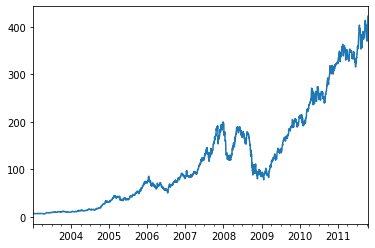

In [78]:
import matplotlib.pyplot as plt
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.AAPL.plot(ax=axes)


<AxesSubplot:>

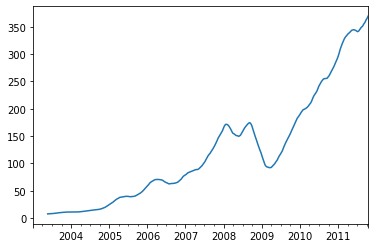

In [80]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.AAPL.rolling(100).mean().plot(ax=axes) #rolling滾動計算100天的平均,rolling是為了讓線條比較平滑

In [66]:
close_px.AAPL.rolling(250).mean()[:250] #使用rolling()前面250筆會變成None

2003-01-02        NaN
2003-01-03        NaN
2003-01-06        NaN
2003-01-07        NaN
2003-01-08        NaN
               ...   
2003-12-22        NaN
2003-12-23        NaN
2003-12-24        NaN
2003-12-26        NaN
2003-12-29    9.26148
Name: AAPL, Length: 250, dtype: float64

In [68]:
close_px.AAPL.rolling(250,min_periods=10).mean()[:20] #使用min_periods會讓前面的None比較少

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    7.355000
2003-01-16    7.350909
2003-01-17    7.325833
2003-01-21    7.301538
2003-01-22    7.275714
2003-01-23    7.263333
2003-01-24    7.240625
2003-01-27    7.230588
2003-01-28    7.233889
2003-01-29    7.246316
2003-01-30    7.242000
Name: AAPL, dtype: float64

In [69]:
apple_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
apple_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Name: AAPL, dtype: float64

<AxesSubplot:>

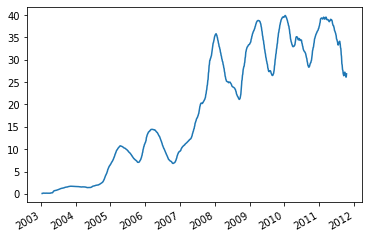

In [71]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
apple_std250.plot(ax=axes) #下圖解釋為每250天的平均差

<AxesSubplot:>

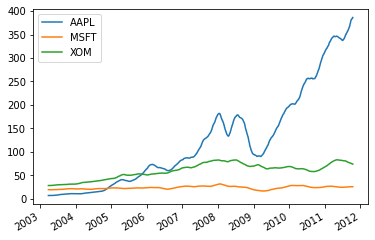

In [75]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.rolling(60).mean().plot(ax=axes) #每60天的平均

<AxesSubplot:>

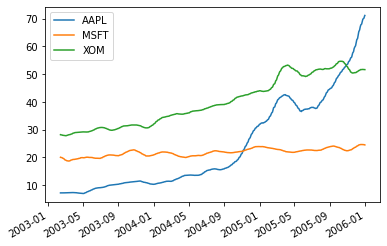

In [78]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px['2003':'2005'].rolling(30).mean().plot(ax=axes)